# Classification test

In [512]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [513]:
df = pd.read_csv("data/BTCUSDT-hour-target-features.csv")
# df1 = pd.read_csv("data/modelv1_training_data.csv")
# dfd = pd.read_csv("data/classification_test.csv")

In [514]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,volatility_atr_o_close,volatility_bb_wband_10,volatility_bb_pband_100,volatility_bb_wband_200,volatility_bb_hband_o_close,volatility_dc_pband_50,volatility_dc_wband_10,volatility_pband_50,volatility_wband_20,volatility_ui_30
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.636138,NaN,NaN
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.635331,NaN,NaN
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.660209,NaN,NaN
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.866626,NaN,NaN
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.895730,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494,2843.709612,...,0.012180,3.017848,0.693336,8.409544,0.029089,0.566189,3.358681,0.782144,2.276933,1.220620
32532,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969,2172.633797,...,0.012307,2.569894,0.833198,8.364569,0.015681,0.750510,3.355372,1.326229,2.317539,1.127279
32533,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370,1870.545827,...,0.012432,2.627245,0.918922,8.329081,0.007811,0.872681,3.352878,1.664419,2.389417,1.020275
32534,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800,1551.876404,...,0.011938,2.740012,0.938006,8.288185,0.005351,0.910804,3.351711,1.768882,2.304459,1.006603


In [515]:
# a = df1["sma_close_50"][500:1000] == df["sma_50_o_close"][500:1000]
# a.value_counts()

In [516]:
# df1["sma_close_50"][500:1000], df["sma_50_o_close"][500:1000]

In [517]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df.copy()
d.dropna(inplace=True)
close = d["close"][29000:]

d = d[list(indicators)].copy().astype(np.float32)

X = d.drop(["target", "close"], axis=1, errors="ignore")[:29000]
y = d["target"][:29000]

X_ft = d.drop(["target", "close"], axis=1, errors="ignore")[29000:]
y_ft = d["target"][29000:]

In [518]:
# X_ft_c = X_ft.copy()
# X_ft_c["close"] = close
# X_ft_c.to_csv("data/modelv1.1_testing.csv", index=False)

In [519]:
# X_ft.info()

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [521]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Precision bug documentation

- Not assigning 

Text(-1.5, 0.5, 'Predicted label')

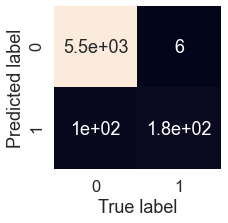

In [522]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

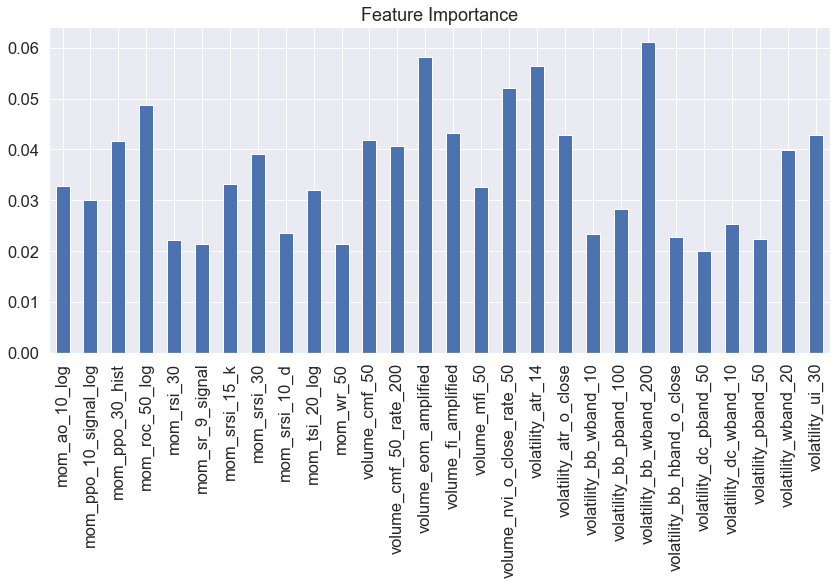

In [523]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(14, 6));

In [524]:
d = {}
d["precision"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))
d

/Volumes/Storage/Programming/bitcoin-printer/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'precision': 0.11151388927543224}

In [525]:
# d["recall"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='recall'))
# d

In [526]:
# d["f1"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1'))
# d

{'precision': 0.11151388927543224, 'f1': 0.08223445027482033}

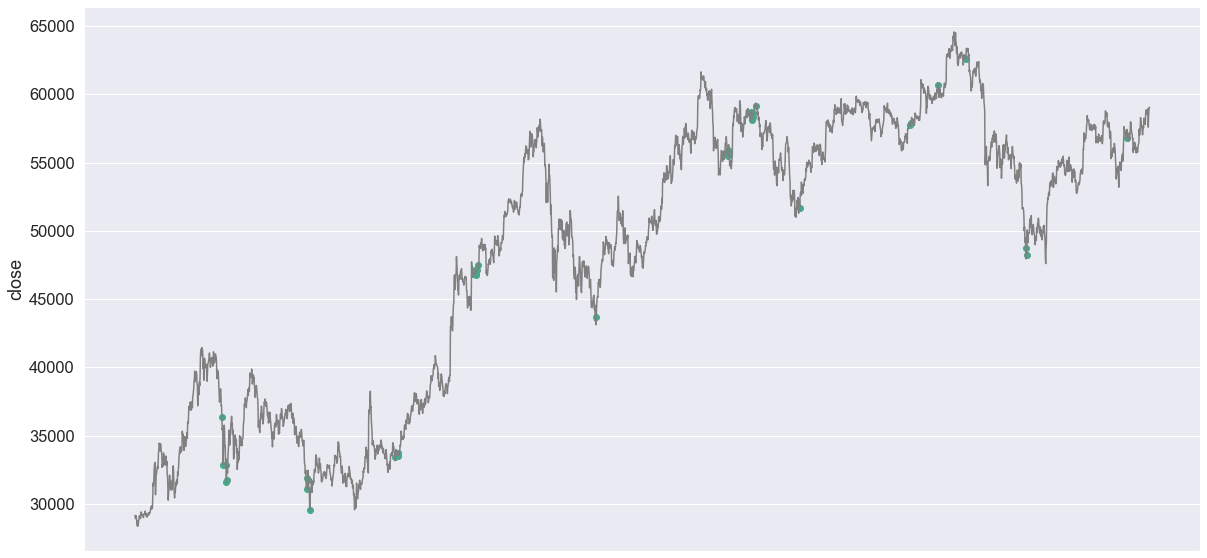

In [527]:
results = model.predict(X_ft)
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close))

s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft, close))
s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft, close))
s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft, close))

fig,ax = plt.subplots(figsize=(20, 10))

rows = len(close)
ax.scatter(range(rows), 
            scatter_results,
            color="#43aa8b")


# ax.scatter(range(rows), 
#             s_missed,
#         color="#f9c74f")

# ax.scatter(range(rows), 
#             s_correct,
#         color="#43aa8b")

# ax.scatter(range(rows), 
#             s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close,
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

## Documentation of scores
| Modules (in order) | Precision (cv=5) E=error| F1 | TP:FP (TP/FP) | Notes |
| --- | :---: | :---: | :---: | --- |
| ` ` `sma` ` ` `volatility` `volume` | E:0. | 0. | 180/97 | |
| `momentum` `sma` `trend-` `volatility` `volume` | E:0. | 0. |  | |



| `momentum` `sma` `trend-` `volatility` `volume` | E:0. | 0. |  | |



In [48]:
from joblib import dump, load

In [49]:
dump(model, 'models/model_v1.1.joblib') 

['models/model_v1.1.joblib']